# Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
class MLP:
    def __init__(self, std_hidden_1i):
        # weights matrix from input layer to hidden layer
        self.W_10 = np.array([np.random.uniform(-2,2,10), np.random.normal(0, std_hidden_1i, 10)]).transpose()
        # weights matrix from hidden layer to output layer
        self.W_21 = np.array(np.random.normal(0, 1, 10))

        
    def forward(self, data):
        # data is already augmented with additional -1 term, so we just do dot multiplication with the 
        # weight matrix from input layer to hidden layer without explicit subtracting of the bias term
        data_in_hidden = np.tanh(np.dot(self.W_10, data))
        output = np.dot(self.W_21, data_in_hidden)
        return output

### Task 1(a) Create 50 MLP objects and store them in the array

In [3]:
MLP_array_1 = [MLP(std_hidden_1i = 2) for i in range(50)]

### Task 1(b) Plot input-output functions

In [4]:
# data should have -1 to accommodate the bias term in the hidden layer
def data_generator(n_samples):
    bias_term = -np.ones(n_samples)
    data_linspace = np.linspace(-2, 2, n_samples)
    data = np.array([bias_term, data_linspace])
    return data 

In [5]:
# Generate 150 data points
data = data_generator(150)

In [6]:
# Do the forward pass on this data for each of the MLP's we created and store their results for the plotting
results_1 = [mlp.forward(data) for mlp in MLP_array_1]

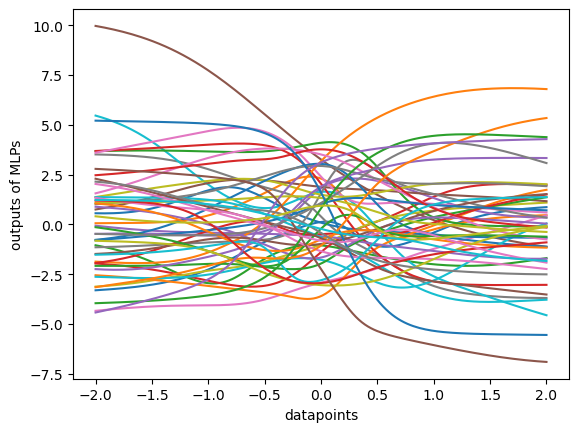

In [7]:
for ind in range(len(MLP_array_1)):
    plt.plot(data[1], results_1[ind], label = f"#{ind + 1}")

plt.xlabel("datapoints")
plt.ylabel("outputs of MLPs")
plt.show()    

### Task 1(c) Create 50 different MLPs with different init scheme for weights of a hidden neuron

In [8]:
MLP_array_2 = [MLP(std_hidden_1i = 0.05) for i in range(50)]

In [9]:
results_2 = [mlp.forward(data) for mlp in MLP_array_2]

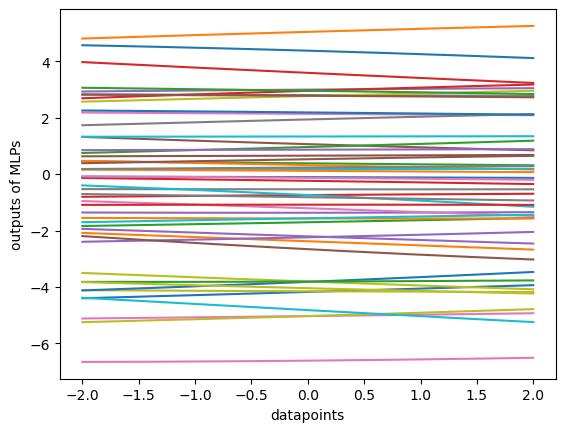

In [10]:
for ind in range(len(MLP_array_2)):
    plt.plot(data[1], results_2[ind], label = f"#{ind + 1}")

plt.xlabel("datapoints")
plt.ylabel("outputs of MLPs")
plt.show()  

Observation: we don't have good local curvature approximations in MLP_2, that was the case in the results of MLP_1. These MLP_2 better approximate linear functions due to the weights intialisation from normal distribution with smaller std. MLP_1 better approximate higher order polynomials (sigmoid-like or cubic ones).

### Task 1(d) Compute MSE of two sets of MLPs with the true function

In [11]:
def true_function(x):
    # Supply np.array type! Cannot do this trick with simple python lists
    return -x

In [12]:
def mse(mlp_out, true_out):
    return (np.square(true_out - mlp_out)).mean()

In [13]:
true_out = true_function(data[1])

In [14]:
MSE_1 = [mse(res, true_out) for res in results_1]

In [15]:
MSE_2 = [mse(res, true_out) for res in results_2]

In [16]:
best_mlp1 = results_1[np.argmin(MSE_1)]

In [17]:
best_mlp2 = results_2[np.argmin(MSE_2)]

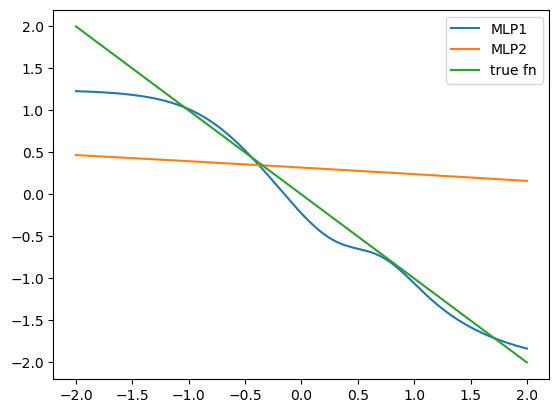

In [18]:
plt.plot(data[1], best_mlp1, label="MLP1")
plt.plot(data[1], best_mlp2, label="MLP2")
plt.plot(data[1], true_out, label="true fn")

plt.legend()
plt.show()

In [19]:
print(np.min(MSE_1))
print(np.min(MSE_2))
print()
print(np.array(MSE_1).mean())
print(np.array(MSE_2).mean())

0.055261714205519265
1.2528402285347309

6.724229488751671
8.816049283119291


On average, results of MLP_2 set are closer to the function -x than results of MLP_1 set, although the best approximation comes from the set of MLP_1.
We can say that MLP_2 better approximates -x with respect to the MSE measure. Smaller standard deviation of hidden layer's weights, drawn from the normal distribution with mean 0, lead to the better approximation of linear functions.

# Task 2

In [20]:
data = np.loadtxt(r'RegressionData.txt')
X = np.array([[data[i][0] for i in range (len(data))]])
Y = np.array([[data[i][1] for i in range (len(data))]])


def initialize_parameters (n_x,n_h,n_y):
    W1 = np.random.randn(n_h,n_x)
    W2 = np.random.randn(n_y,n_h)
    b1 = np.random.randn(n_h,1)
    b2 = np.random.rand(n_y,1)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [21]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing parameters (output of initialization function)
    
    Returns:
    A2 -- The linear output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = Z2
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [22]:
def compute_cost(A2, Y):
    """    
    Arguments:
    A2 -- The linear output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost 
    
    """
    cost = (1/len(Y[0]))* (np.sum(np.power((A2-Y),2)))
    cost = float(np.squeeze(cost))  
    
    return cost

In [23]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = len(X[0])
    W1 = parameters["W1"]
    W2 = parameters["W2"]    

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 -Y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [24]:
def update_parameters(parameters, grads, learning_rate = 0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients 
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """

    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [25]:
def nn_model(X, Y,n_x,n_y,n_h, threshold= 10e-5, iteration = 3000):
    """
    Arguments:
    X -- dataset of shape (1, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    parameters = initialize_parameters (n_x, n_h, n_y)
    cost = [100]
    for i in range (iteration):
        A2,cache = forward_propagation(X,parameters)
        cost.append(compute_cost(A2,Y))
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters (parameters, grads)
        if abs(cost[i ] - cost[i-1])/cost[i] < threshold  :
            return parameters,i,cache,cost[1:]
    
    return parameters,i,cache,cost[1:]

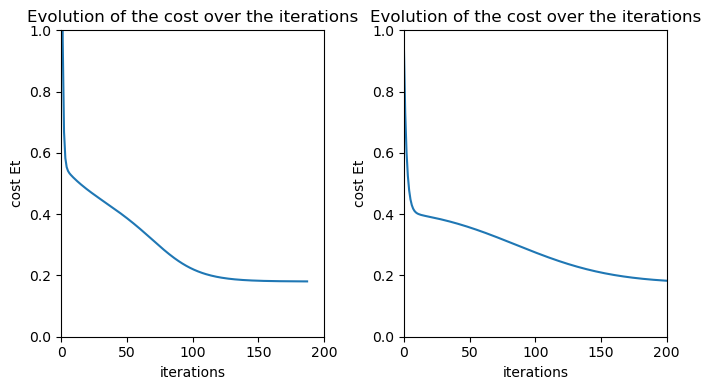

In [26]:
parameters,i,cache,cost = nn_model(X,Y,n_x = 1,n_y=1,n_h=3)
parameters_2,i2,cache_2,cost_2 = nn_model(X,Y,n_x = 1,n_y=1,n_h=3)

figure, ax1 = plt.subplots(1,2,figsize=(7,4))

ax1[0].plot(cost)
ax1[0].set_title('Evolution of the cost over the iterations')
ax1[0].set_xlabel('iterations')
ax1[0].set_ylabel('cost Et')
ax1[0].set_xlim([0,200])
ax1[0].set_ylim([0,1])

ax1[1].plot(cost_2)
ax1[1].set_title('Evolution of the cost over the iterations')
ax1[1].set_xlabel('iterations')
ax1[1].set_ylabel('cost Et')
ax1[1].set_xlim([0,200])
ax1[1].set_ylim([0,1])
figure.tight_layout()


    Plot the output of the hidden units for all input

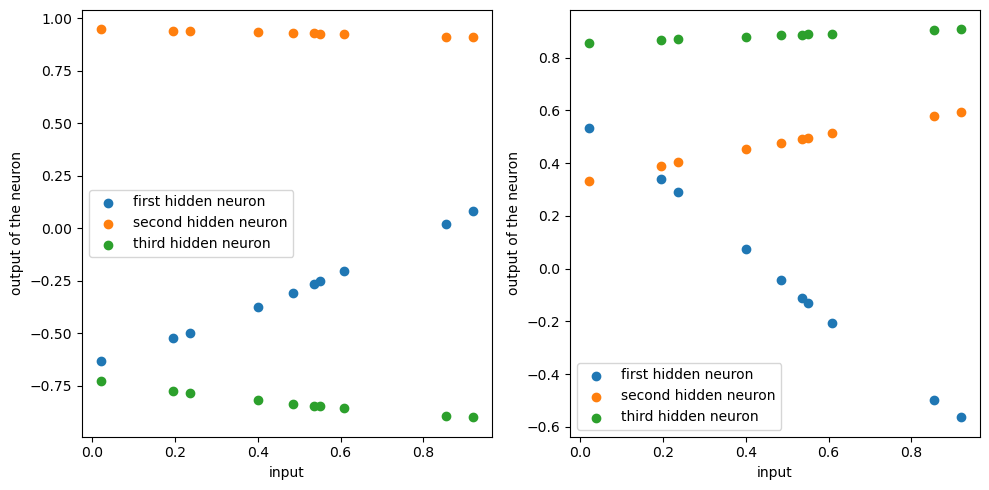

In [27]:
A1 = cache["A1"]
A1_2 = cache_2["A1"]

figure, axis = plt.subplots(1,2,figsize=(10,5))

axis[0].scatter(X,A1[0],label = 'first hidden neuron')
axis[0].scatter(X,A1[1],label = 'second hidden neuron')
axis[0].scatter(X,A1[2],label = 'third hidden neuron')
axis[0].legend()
axis[0].set_xlabel('input')
axis[0].set_ylabel('output of the neuron')

axis[1].scatter(X,A1_2[0],label = 'first hidden neuron')
axis[1].scatter(X,A1_2[1],label = 'second hidden neuron')
axis[1].scatter(X,A1_2[2],label = 'third hidden neuron')
axis[1].legend()
axis[1].set_xlabel('input')
axis[1].set_ylabel('output of the neuron')

plt.tight_layout()
plt.show()

    Plot the output of the network over the input space along with the training set

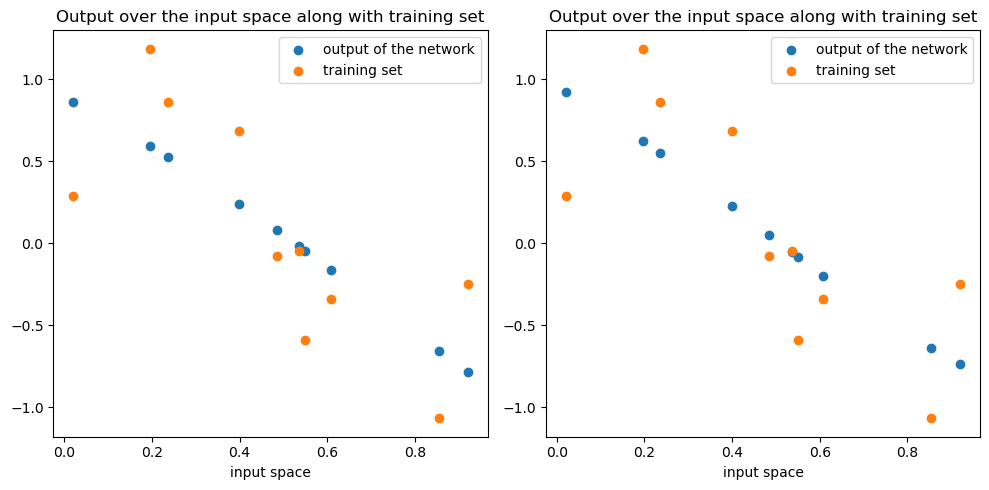

In [28]:
figure, axis = plt.subplots(1,2,figsize=(10,5))

axis[0].scatter(X,cache["A2"],label= 'output of the network')
axis[0].scatter(X,Y,label='training set')
axis[0].set_title('Output over the input space along with training set')
axis[0].set_xlabel('input space')
axis[0].legend()

axis[1].scatter(X,cache_2["A2"],label= 'output of the network')
axis[1].scatter(X,Y,label='training set')
axis[1].set_title('Output over the input space along with training set')
axis[1].set_xlabel('input space')
axis[1].legend()

plt.tight_layout()
plt.show()

MSE is a good choice for a cost function when we are doing Linear Regression. With MSE cost function we assume that the data is normally distributed, it is the best guess we can do when we lack information about data generation process. This regression will be the most optimal solution in terms of time-complexity trade-off.